# EDD Section 1 Team 2 Final project on Spotify Dataset
## Brahim Nid-Youssef, Christino L Barbosa, Enrique Reyes, Ryan Pupia

# 1 - Hypothesize

## 1 - A
## Testable Null and Alternate Hypothesis
### Null: 60% or more of hit songs from 2000s and 2010s have a target variable value of 0.7 or more
### Alternate: 55% or less of hit songs from 2000s and 2010s have a target variable of 0.7 or more

## Configuring notebook and reading in dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats

In [2]:
pd.options.display.float_format='{:.2f}'.format

In [3]:
spotify = pd.read_csv('Spotify_dataset.csv')
spotify = spotify.drop(columns = ['Unnamed: 0'])

#duplicate
spotify_testsub = pd.DataFrame(spotify)

## 1 - B
## Generating target variables

In [4]:
# Separating target subset by 0 and 1
def target_var(spotify_testsub):
    if spotify_testsub['speechiness'] < 0.66 and (spotify_testsub["decade"] == "2010s" or spotify_testsub["decade"] == "2000s") and spotify_testsub["target"] == 1: return 1
    else: return 0
spotify_testsub["target_var"] = spotify_testsub.apply(target_var, axis = 1)

In [5]:
# Creating feature that measures how close a song is to 4 minutes in relation to 4 minutes.
def proximity_to4(spotify_testsub):
    return (240000-abs(240000-spotify_testsub['duration_ms']))/240000
spotify_testsub['proximity_to4'] = spotify_testsub.apply(proximity_to4, axis = 1)

We then create a variable that allows us to look at how proximity to 4 minutes and danceability work in tandem in a single feature that averages both. Therefore, both features have an equal weight in analysis.

In [6]:
# Combining two target features into one by using their average.
def dancy_short(spotify_testsub):
    return (spotify_testsub['danceability'] + spotify_testsub['proximity_to4'])/2
spotify_testsub['danceability_proximity'] = spotify_testsub.apply(dancy_short, axis = 1)

### Analyzing new columns

In [7]:
spotify_testsub.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,duration_ms,time_signature,chorus_hit,sections,target,decade,genres,target_var,proximity_to4,danceability_proximity
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.74,0.63,1,-4.83,0,0.09,0.02,...,188493,4,41.19,10,1,2010s,"['alt z', 'canadian contemporary r&b', 'canadi...",1,0.79,0.76
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.45,0.25,5,-14.66,0,0.03,0.87,...,176880,3,33.18,9,0,2010s,"['adult standards', 'easy listening', 'exotica...",0,0.74,0.59
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.55,0.41,9,-6.56,0,0.05,0.16,...,205463,4,44.89,9,1,2010s,"['danish pop', 'pop', 'scandipop']",1,0.86,0.70
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.50,0.65,0,-5.70,0,0.05,0.01,...,193043,4,29.53,7,0,2010s,"['bass trap', 'edm', 'electronic trap', 'livet...",0,0.80,0.65
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.81,0.89,1,-3.89,1,0.28,0.00,...,144244,4,24.99,8,1,2010s,NaN,1,0.60,0.70


In [8]:
spotify_testsub.describe()[["target_var","proximity_to4","danceability_proximity"]]

,target_var,proximity_to4,danceability_proximity
count,44894.00,44894.00,44894.00
mean,0.15,0.71,0.62
std,0.35,0.40,0.23
min,0.00,-15.38,-7.35
25%,0.00,0.63,0.55
50%,0.00,0.78,0.66
75%,0.00,0.90,0.75
max,1.00,1.00,0.98


# 2 - QA

## Generating data specifics

In [9]:
print('The dimensions are', spotify.shape)
print("Info on the dataset")
spotify.info()

The dimensions are (44894, 22)
Info on the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44894 entries, 0 to 44893
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             44894 non-null  object 
 1   artist            44894 non-null  object 
 2   uri               44894 non-null  object 
 3   danceability      44894 non-null  float64
 4   energy            44894 non-null  float64
 5   key               44894 non-null  int64  
 6   loudness          44894 non-null  float64
 7   mode              44894 non-null  int64  
 8   speechiness       44894 non-null  float64
 9   acousticness      44894 non-null  float64
 10  instrumentalness  44894 non-null  float64
 11  liveness          44894 non-null  float64
 12  valence           44894 non-null  float64
 13  tempo             44894 non-null  float64
 14  duration_ms       44894 non-null  int64  
 15  time_signature    44894 non-null  in

In [10]:
spotify.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genres,target_var
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.74,0.63,1,-4.83,0,0.09,0.02,...,0.71,108.03,188493,4,41.19,10,1,2010s,"['alt z', 'canadian contemporary r&b', 'canadi...",1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.45,0.25,5,-14.66,0,0.03,0.87,...,0.25,155.49,176880,3,33.18,9,0,2010s,"['adult standards', 'easy listening', 'exotica...",0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.55,0.41,9,-6.56,0,0.05,0.16,...,0.27,172.06,205463,4,44.89,9,1,2010s,"['danish pop', 'pop', 'scandipop']",1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.50,0.65,0,-5.70,0,0.05,0.01,...,0.29,91.84,193043,4,29.53,7,0,2010s,"['bass trap', 'edm', 'electronic trap', 'livet...",0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.81,0.89,1,-3.89,1,0.28,0.00,...,0.78,160.52,144244,4,24.99,8,1,2010s,NaN,1


## 2 - A
### Managing Nulls

In [11]:
spotify_testsub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44894 entries, 0 to 44893
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track                   44894 non-null  object 
 1   artist                  44894 non-null  object 
 2   uri                     44894 non-null  object 
 3   danceability            44894 non-null  float64
 4   energy                  44894 non-null  float64
 5   key                     44894 non-null  int64  
 6   loudness                44894 non-null  float64
 7   mode                    44894 non-null  int64  
 8   speechiness             44894 non-null  float64
 9   acousticness            44894 non-null  float64
 10  instrumentalness        44894 non-null  float64
 11  liveness                44894 non-null  float64
 12  valence                 44894 non-null  float64
 13  tempo                   44894 non-null  float64
 14  duration_ms             44894 non-null

Because there are only a few Nulls in the genres column, we decided not to fill them since the column is not related to the testable Hypothesis.

## 2 - B
### Cleaning data from duplicates

#### Testing for duplicates

In [12]:
spotify_testsub.groupby('uri')['uri'].agg('count').describe()

count   40560.00
mean        1.11
std         0.46
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        12.00
Name: uri, dtype: float64

As we can see, our dataset contains multiple instances of the same track ID. This is justifiable when tracks are by different artists, but should never occur if they are by the same artist. 

#### Testing dropping methods
by uri or by track and artist

In [13]:
spotify_droptest = pd.DataFrame(spotify)

In [14]:
spotify_droptest1 = spotify_droptest.drop_duplicates(subset = ["track", "artist"])

In [15]:
spotify_droptest1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40003 entries, 0 to 44893
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             40003 non-null  object 
 1   artist            40003 non-null  object 
 2   uri               40003 non-null  object 
 3   danceability      40003 non-null  float64
 4   energy            40003 non-null  float64
 5   key               40003 non-null  int64  
 6   loudness          40003 non-null  float64
 7   mode              40003 non-null  int64  
 8   speechiness       40003 non-null  float64
 9   acousticness      40003 non-null  float64
 10  instrumentalness  40003 non-null  float64
 11  liveness          40003 non-null  float64
 12  valence           40003 non-null  float64
 13  tempo             40003 non-null  float64
 14  duration_ms       40003 non-null  int64  
 15  time_signature    40003 non-null  int64  
 16  chorus_hit        40003 non-null  float6

Here we kept 40003 rows meaning a thorough deletion of tracks.

In [16]:
spotify_droptesturi = spotify_droptest.drop_duplicates(subset = ["uri"])

In [17]:
spotify_droptesturi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40560 entries, 0 to 44893
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             40560 non-null  object 
 1   artist            40560 non-null  object 
 2   uri               40560 non-null  object 
 3   danceability      40560 non-null  float64
 4   energy            40560 non-null  float64
 5   key               40560 non-null  int64  
 6   loudness          40560 non-null  float64
 7   mode              40560 non-null  int64  
 8   speechiness       40560 non-null  float64
 9   acousticness      40560 non-null  float64
 10  instrumentalness  40560 non-null  float64
 11  liveness          40560 non-null  float64
 12  valence           40560 non-null  float64
 13  tempo             40560 non-null  float64
 14  duration_ms       40560 non-null  int64  
 15  time_signature    40560 non-null  int64  
 16  chorus_hit        40560 non-null  float6

Here we kept more rows, which means a less thorough but safer deletion.

We decided to go with the more thorough option as the diference in row amounts was not considerable enough for us to consider this method unsafe and we would prefer to keep our data as clean as possible. We favoured this method because two different  tracks having the same name and being by the same artist is very uncommon.

## 2 - C
### Gathering pre-QA distribution of features for QA analysis

In [18]:
spotify_testsub.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,target_var,proximity_to4,danceability_proximity
count,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00,44894.00
mean,0.54,0.58,5.23,-10.24,0.69,0.07,0.36,0.15,0.20,0.54,119.16,234686.26,3.89,40.10,10.47,0.50,0.15,0.71,0.62
std,0.18,0.25,3.53,5.30,0.46,0.08,0.34,0.30,0.17,0.27,29.11,118687.09,0.42,19.01,4.87,0.50,0.35,0.40,0.23
min,0.00,0.00,0.00,-49.25,0.00,0.00,0.00,0.00,0.01,0.00,0.00,15168.00,0.00,0.00,0.00,0.00,0.00,-15.38,-7.35
25%,0.42,0.40,2.00,-12.83,0.00,0.03,0.04,0.00,0.09,0.33,97.24,172816.50,4.00,27.59,8.00,0.00,0.00,0.63,0.55
50%,0.55,0.60,5.00,-9.29,1.00,0.04,0.26,0.00,0.13,0.56,117.27,217987.00,4.00,35.80,10.00,1.00,0.00,0.78,0.66
75%,0.67,0.79,8.00,-6.41,1.00,0.07,0.68,0.06,0.26,0.77,136.15,266800.00,4.00,47.60,12.00,1.00,0.00,0.90,0.75
max,0.99,1.00,11.00,3.74,1.00,0.96,1.00,1.00,1.00,1.00,241.42,4170227.00,5.00,433.18,169.00,1.00,1.00,1.00,0.98


In [19]:
spotify_testsub['decade'].value_counts(normalize = True)

1960s   0.21
1970s   0.19
1980s   0.17
2010s   0.15
2000s   0.14
1990s   0.13
Name: decade, dtype: float64

In [20]:
spotify_testsub.groupby('uri')['uri'].agg('count').describe()

count   40560.00
mean        1.11
std         0.46
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        12.00
Name: uri, dtype: float64

### Applying our cleaning to the dataset and verifying it's effects

In [21]:
# Cleaning data from duplicates based on "track" and "artist" features.
spotify_testsub = spotify_testsub.drop_duplicates(subset = ["track", "artist"])

In [22]:
spotify_testsub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40003 entries, 0 to 44893
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track                   40003 non-null  object 
 1   artist                  40003 non-null  object 
 2   uri                     40003 non-null  object 
 3   danceability            40003 non-null  float64
 4   energy                  40003 non-null  float64
 5   key                     40003 non-null  int64  
 6   loudness                40003 non-null  float64
 7   mode                    40003 non-null  int64  
 8   speechiness             40003 non-null  float64
 9   acousticness            40003 non-null  float64
 10  instrumentalness        40003 non-null  float64
 11  liveness                40003 non-null  float64
 12  valence                 40003 non-null  float64
 13  tempo                   40003 non-null  float64
 14  duration_ms             40003 non-null

In [23]:
spotify_testsub.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,target_var,proximity_to4,danceability_proximity
count,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00
mean,0.54,0.58,5.21,-10.22,0.69,0.07,0.36,0.15,0.20,0.54,119.34,234540.75,3.89,40.12,10.46,0.50,0.15,0.71,0.62
std,0.18,0.25,3.53,5.30,0.46,0.09,0.34,0.30,0.17,0.27,29.10,119043.19,0.42,19.02,4.88,0.50,0.36,0.40,0.23
min,0.00,0.00,0.00,-49.25,0.00,0.00,0.00,0.00,0.01,0.00,0.00,15168.00,0.00,0.00,0.00,0.00,0.00,-15.38,-7.35
25%,0.42,0.40,2.00,-12.81,0.00,0.03,0.04,0.00,0.09,0.33,97.35,172760.00,4.00,27.62,8.00,0.00,0.00,0.63,0.56
50%,0.55,0.60,5.00,-9.25,1.00,0.04,0.26,0.00,0.13,0.56,117.56,217605.00,4.00,35.85,10.00,1.00,0.00,0.78,0.66
75%,0.67,0.79,8.00,-6.37,1.00,0.07,0.68,0.06,0.26,0.77,136.54,266267.00,4.00,47.64,12.00,1.00,0.00,0.90,0.75
max,0.99,1.00,11.00,3.74,1.00,0.96,1.00,1.00,1.00,1.00,241.42,4170227.00,5.00,433.18,169.00,1.00,1.00,1.00,0.98


In [24]:
spotify_testsub['decade'].value_counts(normalize = True)

1960s   0.21
1970s   0.19
1980s   0.17
2010s   0.16
2000s   0.14
1990s   0.13
Name: decade, dtype: float64

In [25]:
spotify_testsub.groupby('uri')['uri'].agg('count').describe()

count   39881.00
mean        1.00
std         0.06
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         3.00
Name: uri, dtype: float64

Since our cleaning affected the data mininmaly, we decided to accept this method and move on to analysis.

## 3 - Exploratory Data Analysis

In [26]:
spotify_testsub.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,target_var,proximity_to4,danceability_proximity
count,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00,40003.00
mean,0.54,0.58,5.21,-10.22,0.69,0.07,0.36,0.15,0.20,0.54,119.34,234540.75,3.89,40.12,10.46,0.50,0.15,0.71,0.62
std,0.18,0.25,3.53,5.30,0.46,0.09,0.34,0.30,0.17,0.27,29.10,119043.19,0.42,19.02,4.88,0.50,0.36,0.40,0.23
min,0.00,0.00,0.00,-49.25,0.00,0.00,0.00,0.00,0.01,0.00,0.00,15168.00,0.00,0.00,0.00,0.00,0.00,-15.38,-7.35
25%,0.42,0.40,2.00,-12.81,0.00,0.03,0.04,0.00,0.09,0.33,97.35,172760.00,4.00,27.62,8.00,0.00,0.00,0.63,0.56
50%,0.55,0.60,5.00,-9.25,1.00,0.04,0.26,0.00,0.13,0.56,117.56,217605.00,4.00,35.85,10.00,1.00,0.00,0.78,0.66
75%,0.67,0.79,8.00,-6.37,1.00,0.07,0.68,0.06,0.26,0.77,136.54,266267.00,4.00,47.64,12.00,1.00,0.00,0.90,0.75
max,0.99,1.00,11.00,3.74,1.00,0.96,1.00,1.00,1.00,1.00,241.42,4170227.00,5.00,433.18,169.00,1.00,1.00,1.00,0.98


In [27]:
#Checking distribution of generated target variable.
spotify_testsub['danceability_proximity'].describe()

count   40003.00
mean        0.62
std         0.23
min        -7.35
25%         0.56
50%         0.66
75%         0.75
max         0.98
Name: danceability_proximity, dtype: float64

In [28]:
# Creating labeled buckets for target varible and generating a graph
def dancproxgroups(spotify_testsub):
    if spotify_testsub['danceability_proximity'] < 0: return '-8 to 0'
    elif spotify_testsub['danceability_proximity'] > 0 and spotify_testsub['danceability_proximity'] <= 0.1: return "0 to 0.1" 
    elif spotify_testsub['danceability_proximity'] > 0.1 and spotify_testsub['danceability_proximity'] <= 0.2: return "0.1 to 0.2"
    elif spotify_testsub['danceability_proximity'] > 0.2 and spotify_testsub['danceability_proximity'] <= 0.3: return "0.2 to 0.3" 
    elif spotify_testsub['danceability_proximity'] > 0.3 and spotify_testsub['danceability_proximity'] <= 0.4: return "0.3 to 0.4" 
    elif spotify_testsub['danceability_proximity'] > 0.4 and spotify_testsub['danceability_proximity'] <= 0.5: return "0.4 to 0.5" 
    elif spotify_testsub['danceability_proximity'] > 0.5 and spotify_testsub['danceability_proximity'] <= 0.6: return "0.5 to 0.6" 
    elif spotify_testsub['danceability_proximity'] > 0.6 and spotify_testsub['danceability_proximity'] <= 0.7: return "0.6 to 0.7" 
    elif spotify_testsub['danceability_proximity'] > 0.7 and spotify_testsub['danceability_proximity'] <= 0.8: return "0.7 to 0.8" 
    elif spotify_testsub['danceability_proximity'] > 0.8 and spotify_testsub['danceability_proximity'] <= 0.9: return "0.8 to 0.9" 
    elif spotify_testsub['danceability_proximity'] > 0.9: return "0.9 to 1"
    else: return 99
spotify_testsub['target_groups'] = spotify_testsub.apply(dancproxgroups, axis=1)

In [29]:
spotify_testsub.groupby('target_groups')['target_groups'].agg('count')


target_groups
-8 to 0         574
0 to 0.1        170
0.1 to 0.2      308
0.2 to 0.3      685
0.3 to 0.4     1414
0.4 to 0.5     3431
0.5 to 0.6     7294
0.6 to 0.7    11045
0.7 to 0.8    10197
0.8 to 0.9     4417
0.9 to 1        468
Name: target_groups, dtype: int64

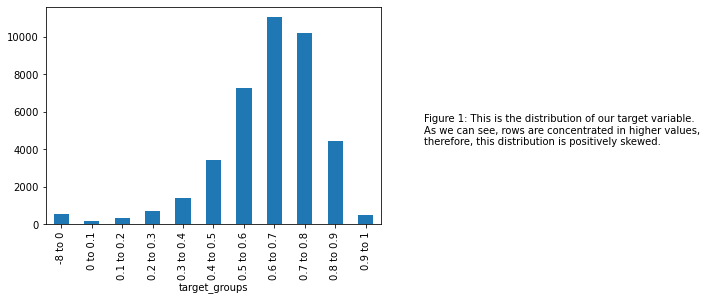

In [30]:
fig=plt.figure()

spotify_testsub.groupby('target_groups')['target_groups'].agg('count').plot(kind = 'bar')
cap="Figure 1: This is the distribution of our target variable.\nAs we can see, rows are concentrated in higher values,\ntherefore, this distribution is positively skewed."
fig.text(1,.4,cap)
plt.savefig("dist_targ.jpg",bbox_inches='tight')

### Exploring Hypothesis

In [31]:
# Creating a column for danceability proximity values above 0.7 for analysis and plotting.
def target_grouping(spotify_testsub):
    if spotify_testsub["danceability_proximity"] > 0.7: return "Above 0.7"
    elif spotify_testsub["danceability_proximity"] <= 0.7: return "0.7 or less"
    else: return 99
spotify_testsub["target_label"] = spotify_testsub.apply(target_grouping, axis = 1)

In [32]:
# Creating subset with target population.
spotify_hit_recent_songs = spotify_testsub[spotify_testsub["target_var"] == 1]

In [33]:
# Analyzing target variable distribution in target population subset.
spotify_hit_recent_songs["danceability_proximity"].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9])

count   6042.00
mean       0.75
std        0.10
min       -0.79
10%        0.64
20%        0.68
30%        0.71
40%        0.73
50%        0.75
60%        0.77
70%        0.80
80%        0.82
90%        0.86
max        0.98
Name: danceability_proximity, dtype: float64

We can see that 30% of the population has danceability_proximity values up to 0.71, which indicates that the remaining 70% has values above that, suporting our null hypothesis.

Text(1, 0.4, 'Figure 2: Distribution of our target variable, danceability_prximity, organized from\nhighest proportion to smallest.')

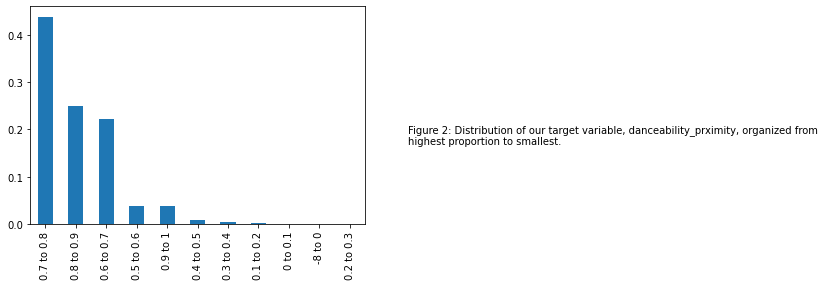

In [34]:
fig = plt.figure()
spotify_hit_recent_songs['target_groups'].value_counts(normalize = True).plot(kind = "bar", stacked = True)
cap="Figure 2: Distribution of our target variable, danceability_prximity, organized from\nhighest proportion to smallest."
fig.text(1,.4,cap)

In [35]:
distribution = pd.DataFrame(spotify_hit_recent_songs['target_label'].value_counts(normalize = True))
distribution

,target_label
Above 0.7,0.73
0.7 or less,0.27


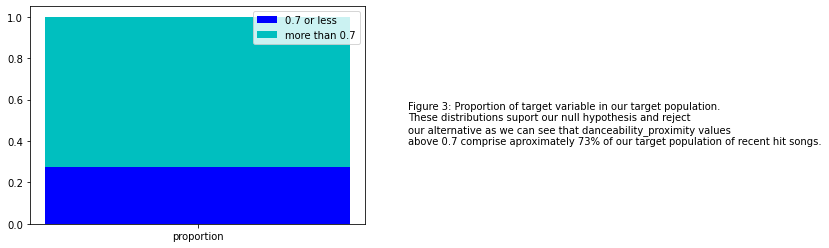

In [36]:
fig=plt.figure()
# Demonstrate proportions through a staked bar plot
plt.bar("proportion", distribution.iloc[1],  color = "b")
plt.bar("proportion", distribution.iloc[0], bottom =  distribution.iloc[1], color = "c")
plt.legend(["0.7 or less", "more than 0.7"])

cap="Figure 3: Proportion of target variable in our target population.\nThese distributions suport our null hypothesis and reject\nour alternative as we can see that danceability_proximity values\nabove 0.7 comprise aproximately 73% of our target population of recent hit songs."
fig.text(1,.4,cap)
plt.savefig("prop_targ.jpg",bbox_inches='tight')

From analysis, we concluded that we must accept the Null and reject the Alternate.

## 4 - Deep dive/Modeling

We will investigate how our variable is distributed among other populations, such as non-hit songs or recent non-hit songs.

In [37]:
# Extracting non hit subset.
non_hits = spotify_testsub[(spotify_testsub['target'] == 0) & (spotify_testsub['speechiness'] < 0.66)]
non_hits.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,chorus_hit,sections,target,decade,genres,target_var,proximity_to4,danceability_proximity,target_groups,target_label
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.45,0.25,5,-14.66,0,0.03,0.87,...,33.18,9,0,2010s,"['adult standards', 'easy listening', 'exotica...",0,0.74,0.59,0.5 to 0.6,0.7 or less
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.50,0.65,0,-5.70,0,0.05,0.01,...,29.53,7,0,2010s,"['bass trap', 'edm', 'electronic trap', 'livet...",0,0.80,0.65,0.6 to 0.7,0.7 or less
6,Sex Metal Barbie,In This Moment,spotify:track:75BGF4LC7AOLFfxn6ukZDH,0.53,0.94,0,-3.70,1,0.13,0.01,...,21.05,14,0,2010s,"['alternative metal', 'melodic metalcore', 'nu...",0,0.91,0.72,0.7 to 0.8,Above 0.7
8,Holiday With HH,No Bros,spotify:track:7LBa0KNFR8IY3g7LOfXqu8,0.17,0.98,7,-2.89,1,0.17,0.00,...,31.24,11,0,2010s,NaN,0,0.95,0.56,0.5 to 0.6,0.7 or less
11,Cirrus,Bonobo,spotify:track:2lJ4d8MCT6ZlDRHKJ1br14,0.64,0.84,2,-8.41,0,0.04,0.40,...,80.60,13,0,2010s,"['downtempo', 'electronica', 'jazztronica', 'n...",0,0.53,0.59,0.5 to 0.6,0.7 or less


In [38]:
# Checking distribution of target variable based on threshold.
non_distribution = pd.DataFrame(non_hits['target_label'].value_counts(normalize= True))
non_distribution

,target_label
0.7 or less,0.77
Above 0.7,0.23


In [39]:
# Extracting recent non-hit song subset.
recent_non_hits = spotify_testsub[(spotify_testsub['target'] == 0) & (spotify_testsub['speechiness'] < 0.66) & ((spotify_testsub['decade'] == "2010s") | (spotify_testsub['decade'] == "2000s"))]
recent_non_hits.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,chorus_hit,sections,target,decade,genres,target_var,proximity_to4,danceability_proximity,target_groups,target_label
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.45,0.25,5,-14.66,0,0.03,0.87,...,33.18,9,0,2010s,"['adult standards', 'easy listening', 'exotica...",0,0.74,0.59,0.5 to 0.6,0.7 or less
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.50,0.65,0,-5.70,0,0.05,0.01,...,29.53,7,0,2010s,"['bass trap', 'edm', 'electronic trap', 'livet...",0,0.80,0.65,0.6 to 0.7,0.7 or less
6,Sex Metal Barbie,In This Moment,spotify:track:75BGF4LC7AOLFfxn6ukZDH,0.53,0.94,0,-3.70,1,0.13,0.01,...,21.05,14,0,2010s,"['alternative metal', 'melodic metalcore', 'nu...",0,0.91,0.72,0.7 to 0.8,Above 0.7
8,Holiday With HH,No Bros,spotify:track:7LBa0KNFR8IY3g7LOfXqu8,0.17,0.98,7,-2.89,1,0.17,0.00,...,31.24,11,0,2010s,NaN,0,0.95,0.56,0.5 to 0.6,0.7 or less
11,Cirrus,Bonobo,spotify:track:2lJ4d8MCT6ZlDRHKJ1br14,0.64,0.84,2,-8.41,0,0.04,0.40,...,80.60,13,0,2010s,"['downtempo', 'electronica', 'jazztronica', 'n...",0,0.53,0.59,0.5 to 0.6,0.7 or less


In [40]:
# Checking distribution of target variable based on threshold.
rec_non_distribution = pd.DataFrame(recent_non_hits['target_label'].value_counts(normalize = True))
rec_non_distribution

,target_label
0.7 or less,0.72
Above 0.7,0.28


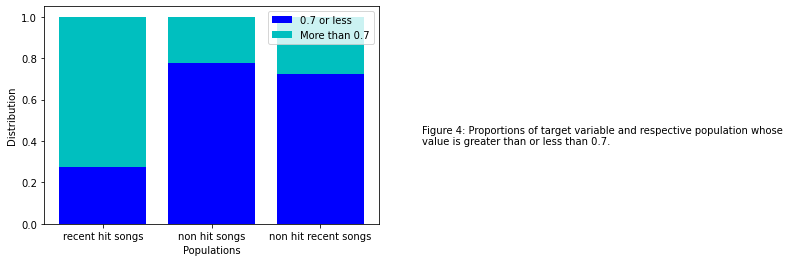

In [41]:
fig=plt.figure()

plt.bar("recent hit songs", distribution.iloc[1], color = "b")
plt.bar("recent hit songs", distribution.iloc[0], bottom = distribution.iloc[1], color = "c")
plt.bar("non hit songs", non_distribution.iloc[0], color = "b")
plt.bar("non hit songs", non_distribution.iloc[1], bottom = non_distribution.iloc[0], color = "c")
plt.bar("non hit recent songs", rec_non_distribution.iloc[0], color = "b")
plt.bar("non hit recent songs", rec_non_distribution.iloc[1], bottom = rec_non_distribution.iloc[0], color = "c")
plt.xlabel("Populations")
plt.ylabel("Distribution")
plt.legend(["0.7 or less", "More than 0.7"])
cap="Figure 4: Proportions of target variable and respective population whose\nvalue is greater than or less than 0.7."
fig.text(1,.4,cap)
plt.savefig("prop_targ_3plots.jpg",bbox_inches='tight')

### Modeling

- H0: If p-value is larger than 5% then population means are NOT equal
- H1: Other wise population means differ

In [42]:
#running 2 ttest: comparing targert population to other two populations
#target population vs recent non hits
stats.ttest_ind(spotify_hit_recent_songs.danceability_proximity.sample(frac=0.1),
                recent_non_hits.danceability_proximity.sample(frac=0.1))

Ttest_indResult(statistic=15.40124522076536, pvalue=5.896816950780072e-49)

In [43]:
#target population vs non hits
stats.ttest_ind(spotify_hit_recent_songs.danceability_proximity.sample(frac=0.1),
                non_hits.danceability_proximity.sample(frac=0.1))

Ttest_indResult(statistic=15.095843609849421, pvalue=2.1027932197987656e-49)

In [44]:
#using the prearsonr to find correlation (which is two tailed)
#for target population and recent non hits
stats.pearsonr(spotify_hit_recent_songs.danceability_proximity.sample(25),
                recent_non_hits.danceability_proximity.sample(25))

(0.08886390360129581, 0.6727262001594512)

In [45]:
#for target population and non hits
stats.pearsonr(spotify_hit_recent_songs.danceability_proximity.sample(25),
                non_hits.danceability_proximity.sample(25))

(-0.19074923838081645, 0.3610618232128677)

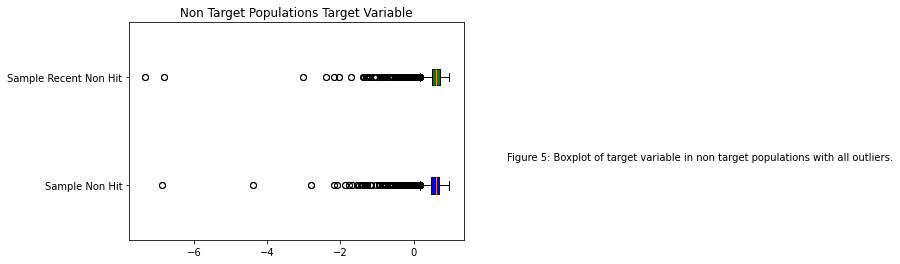

In [46]:
#setting seed
random.seed(0)
sample_hit_recent_songs=spotify_hit_recent_songs.sample(5000)
sample_recentNonHit=recent_non_hits.sample(5000)
sample_nonHit=non_hits.sample(5000)

#removing outliers through greater than 0
sample_nonHitL=sample_nonHit.danceability_proximity.squeeze()
sample_recentNonHitL=sample_recentNonHit.danceability_proximity.squeeze()
#box plot to check for outliers
fig,ax=plt.subplots()

colors = ['blue', 'green']
data=[sample_nonHitL,sample_recentNonHitL]
#creating axis intance for color application to boxes
boxplot = ax.boxplot(data, patch_artist = True, vert = 0)
#coloring boxplot
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

xlabel=["Sample Non Hit","Sample Recent Non Hit"]
plt.title("Non Target Populations Target Variable")
ax.boxplot([sample_nonHit.danceability_proximity,sample_recentNonHit.danceability_proximity],vert=False)
plt.yticks(ticks=[1,2],labels=xlabel)

cap="Figure 5: Boxplot of target variable in non target populations with all outliers."
fig.text(1,.4,cap)
plt.show()

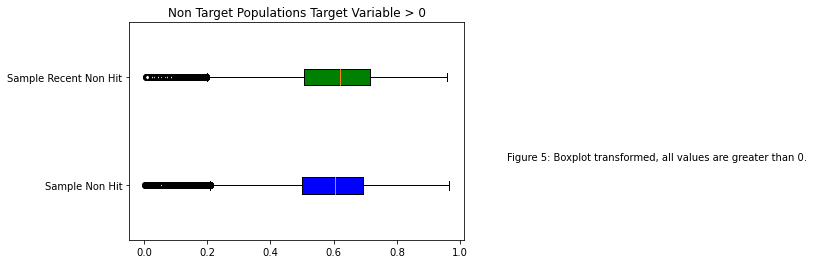

In [47]:
#removing values below zero
sample_nonHitL= [ num for num in sample_nonHit.danceability_proximity if num > 0]
sample_recentNonHitL= [ num for num in sample_recentNonHit.danceability_proximity if num > 0]

fig,ax=plt.subplots()
#adding color
colors = ['blue', 'green']
data=[sample_nonHitL,sample_recentNonHitL]

boxplot = ax.boxplot(data, patch_artist = True, vert = 0)
#coloring boxplot
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
#creating axis intance for color application to boxes
ax.boxplot([sample_nonHitL,sample_recentNonHitL],vert=False)
plt.title("Non Target Populations Target Variable > 0")
plt.yticks(ticks=[1,2],labels=xlabel)

cap = "Figure 5: Boxplot transformed, all values are greater than 0."
fig.text(1,.4,cap)
plt.show()

In [48]:
#creating sample models
result_recentNonHit = stats.linregress(sample_hit_recent_songs.danceability_proximity,sample_recentNonHit.danceability_proximity)
result_nonHit = stats.linregress(sample_hit_recent_songs.danceability_proximity,sample_nonHit.danceability_proximity)

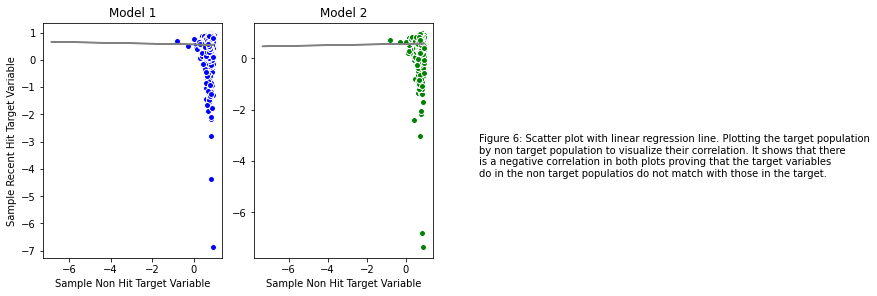

In [49]:
#subplot reigion for side comparison
fig, axis = plt.subplots(1,2,constrained_layout=True)

#plotting linear regression for recent nonhit songs
axis[1].set_title("Model 2")
axis[1].scatter(sample_hit_recent_songs.danceability_proximity,sample_recentNonHit.danceability_proximity,color="green",edgecolors='w')
reg_line = result_recentNonHit.intercept + result_recentNonHit.slope*sample_recentNonHit.danceability_proximity
axis[1].plot(sample_recentNonHit.danceability_proximity,reg_line,color="grey")
axis[1].set_xlabel("Sample Non Hit Target Variable")

#plotting linear regression for sample nonhit songs
axis[0].scatter(sample_hit_recent_songs.danceability_proximity,sample_nonHit.danceability_proximity,color="blue",edgecolors='w')
reg_line = result_nonHit.intercept + result_nonHit.slope*sample_nonHit.danceability_proximity
axis[0].plot(sample_nonHit.danceability_proximity,reg_line,color="grey")
axis[0].set_title("Model 1")
axis[0].set_xlabel("Sample Non Hit Target Variable")
axis[0].set_ylabel("Sample Recent Hit Target Variable")

cap="Figure 6: Scatter plot with linear regression line. Plotting the target population\n"
c2="by non target population to visualize their correlation. It shows that there\n"
c3="is a negative correlation in both plots proving that the target variables\n"
c4="do in the non target populatios do not match with those in the target."
fig.text(1.1,.4,cap+c2+c3+c4)

plt.savefig("models.jpg",bbox_inches='tight')
plt.show()


In [50]:
#taking sample of equal sizes because of possible unequal list sizes
sample_nonHitEven=random.sample(sample_recentNonHitL,4857)
sample_recentNonHitEven=random.sample(sample_nonHitL,4857)
#removing values less than 0
sample_hit_recent_songsEven=[num for num in sample_hit_recent_songs.danceability_proximity if num > 0]
sample_hit_recent_songsEven=random.sample(sample_hit_recent_songsEven,4857)

#creating sample models
result_recentNonHitEven = stats.linregress(sample_hit_recent_songsEven,sample_recentNonHitEven)
result_nonHitEven = stats.linregress(sample_hit_recent_songsEven,sample_nonHitEven)

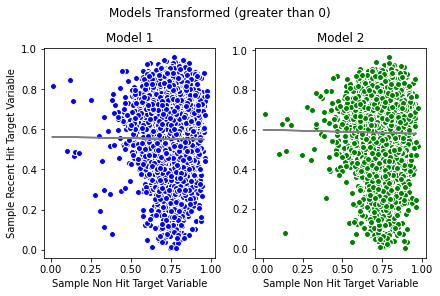

In [51]:
#subplot reigion for side comparison
fig, axis = plt.subplots(1,2,constrained_layout=True)

#plotting linear regression for recent nonhit songs
axis[1].set_title("Model 2")
axis[1].scatter(sample_hit_recent_songsEven,sample_recentNonHitEven,color="green",edgecolors='w')
reg_line = result_recentNonHitEven.intercept + result_recentNonHitEven.slope*np.array(sample_recentNonHitEven)
axis[1].plot(sample_recentNonHitEven,reg_line,color="grey")
axis[1].set_xlabel("Sample Non Hit Target Variable")

#plotting linear regression for sample nonhit songs
axis[0].scatter(sample_hit_recent_songsEven,sample_nonHitEven,color="blue",edgecolors='w')
reg_line = result_nonHit.intercept + result_nonHit.slope*np.array(sample_nonHitEven)
axis[0].plot(sample_nonHitEven,reg_line,color="grey")
axis[0].set_title("Model 1")
axis[0].set_xlabel("Sample Non Hit Target Variable")
axis[0].set_ylabel("Sample Recent Hit Target Variable")
fig.suptitle("Models Transformed (greater than 0)")

plt.savefig("models_even.jpg",bbox_inches='tight')
plt.show()


From these results, we can say that high danceability and proximity to four minutes make a song more likely to become a hit.